## Rishab Vaishya
## Class - CSE 8392 Special Topics (Advanced Application Programming) 
## Quest 5 - Pandas 2
## SMU ID – 47505527
<br><br>
# Part A. States and area codes

we read from the states.areacodes.csv and display the 1st 5 rows of the data

In [497]:
import pandas as pd

csvfile = open(r'D:\\Documents\Notes\CSE - 7345 - Advance Application Programming\Assignment 5\states.areacodes.csv', 'r')
area_codes = pd.read_csv(csvfile)

# head functios shows only the top 5 rows of the table
area_codes.head()

,ï»¿Area code,State,State code
0,201,New Jersey,NJ
1,202,"Washington,DC",DC
2,203,Connecticut,CT
3,205,Alabama,AL
4,206,Washington,WA


Now, make a list of all the non state present in the dataframe & remove it using 'isin' function & taking '~' negation of it

In [498]:
non_US_state_codes = ['DC','AS','GU','MP','PR','VI']

# removes all rows having state codes from the above list 
area_codes = area_codes[~area_codes['State code'].isin(non_US_state_codes)]

# head functios shows only the top 5 rows of the table
area_codes.head()

,ï»¿Area code,State,State code
0,201,New Jersey,NJ
2,203,Connecticut,CT
3,205,Alabama,AL
4,206,Washington,WA
5,207,Maine,ME


here we do the following in sequence

1. sort the data in ascending order.
2. group by states
3. filter the group who has length == 1
4. display the group by their size.

In [499]:
# 1. sort the data in ascending order.
area_codes = area_codes.sort_values(['State'],ascending=True)

# 2. group by states
area_codes_grouped = area_codes.groupby(['State'])

# 3. filter the group who has length == 1
area_codes_filtered = area_codes_grouped.filter(lambda area_codes_groupby_state: len(area_codes_groupby_state) == 1)

# 4. display the group by their size.
area_codes_filtered.groupby('State').size()

State
Alaska           1
Delaware         1
Hawaii           1
Idaho            1
Maine            1
Montana          1
New Hampshire    1
New Mexico       1
North Dakota     1
Rhode Island     1
South Dakota     1
Vermont          1
West Virginia    1
Wyoming          1
dtype: int64

# Part B. Zipcodes and States

we read from the zipcodes.states.gps.csv and display the 1st 5 rows of the data

In [500]:
csvfile = open(r'D:\\Documents\Notes\CSE - 7345 - Advance Application Programming\Assignment 5\zipcodes.states.gps.csv', 'r')
zipcodes_state_gps = pd.read_csv(csvfile)

# head functios shows only the top 5 rows of the table
zipcodes_state_gps.head()

,zip_code,latitude,longitude,city,state,county
0,501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,602,18.393103,-67.180953,Aguada,PR,Aguada
4,603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


 we import matplot lib then customize the graph, so that the bar chart is displayed properly
 
 1. we first group the data by states & keep only the 'zip_code' column 
 2. sort values in decending
 3. plot the bar graph

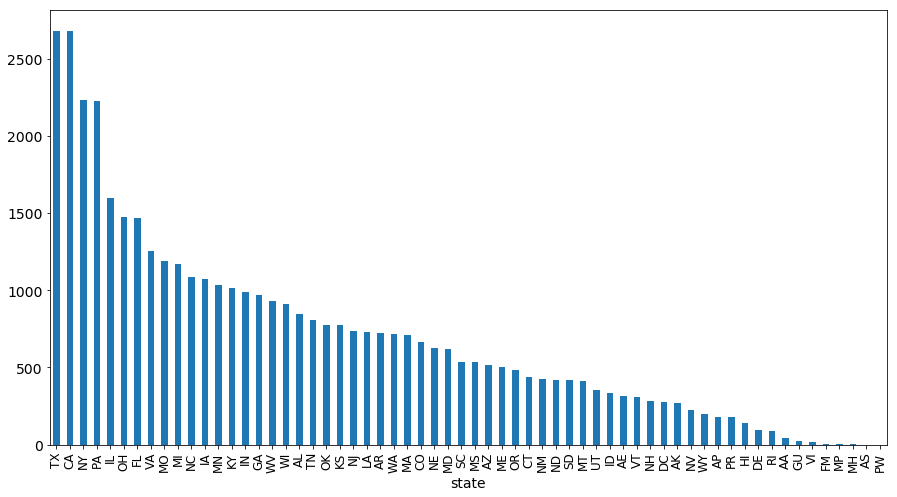

In [501]:
import matplotlib.pyplot as plt
%matplotlib inline

# edit graph settings to view it nicely
plt.rcParams['figure.figsize'] = (15,8)
plt.xlabel('X label size', size = 14)
plt.yticks(size = 14)
plt.xticks(size = 12)

# 1. we first group the data by states & keep only the 'zip_code' column 
# 2. sort values in decending
# 3. plot the bar graph
zipcodes_state_gps.groupby('state')['zip_code'].size().sort_values(ascending=False).plot(kind='bar')

# Part C. Films

we read from the films2.csv and display the 1st 5 rows of the data

In [502]:
csvfile = open(r'D:\\Documents\Notes\CSE - 7345 - Advance Application Programming\Assignment 5\films2.csv', 'r')
films = pd.read_csv(csvfile)

# head functios shows only the top 5 rows of the table
films.head()

,ï»¿Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,"*Image,,,,,"
0,1990,111.0,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","AlmodÃ³var, Pedro",68.0,No,"NicholasCage.png,,"
1,1991,113.0,High Heels,Comedy,"BosÃ©, Miguel","Abril, Victoria","AlmodÃ³var, Pedro",68.0,No,"NicholasCage.png,,"
2,1983,104.0,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79.0,No,"NicholasCage.png,"
3,1979,122.0,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6.0,No,"seanConnery.png,,"
4,1978,94.0,Days of Heaven,Drama,"Gere, Richard","Adams, Brooke","Malick, Terrence",14.0,No,"NicholasCage.png,,"


Here we are doing the following

1. we merge 'Westerns' into 'Western'
2. Add another column name 'nFilms' which holds the count the count of group subject & actor
3. get max value of 'nFilms' for each row using idmax() function
4. display the result

In [503]:
# 1. replace westerns to western 
films = films.replace('Westerns', 'Western')

# 2. group by 'Subject' & 'Actor'
films = films.groupby(['Subject','Actor']).size().reset_index(name="nFilms")

# remove all rows with nFilms == 1
films = films[films.nFilms !=1]

# get max value of 'nFilms' for each row using idmax() function
films = films.loc[films.groupby(["Subject"], sort=False)["nFilms"].idxmax()][["Subject","Actor","nFilms"]]

films

,Subject,Actor,nFilms
15,Action,"Connery, Sean",15
321,Comedy,"Sellers, Peter",22
399,Drama,"Brando, Marlon",17
739,Horror,"Ford, Wallace",3
822,Mystery,"Connery, Sean",3
915,Science Fiction,"Hamill, Mark",3
956,War,"Wayne, John",10
996,Western,"Wayne, John",46


# Part D. Stock Trading Algorithm with Moving Averages (MA)

we read from the SPY.histdata.csv and display the 1st 5 rows of the data after doing the following editions

1. sort the values in Date ascendng
2. add the moving verage column
3. drop rows with NaN values for 'MA100' columns

In [504]:
csvfile = open(r'D:\\Documents\Notes\CSE - 7345 - Advance Application Programming\Assignment 5\SPY.histdata.csv', 'r')
SPY_hist_data = pd.read_csv(csvfile, parse_dates=['Date'])

# sort the values in Date ascendng
SPY_hist_data = SPY_hist_data.sort_values(by='Date', ascending=True)

# add the moving verage column
SPY_hist_data['MA100'] = SPY_hist_data['SPY'].rolling(100).mean()

# drop rows with NaN values for 'MA100' columns
SPY_hist_data = SPY_hist_data.dropna()

# head functios shows only the top 5 rows of the table
SPY_hist_data.head()

,Date,SPY,MA100
4602,2000-05-24,99.5118,101.376287
4601,2000-05-25,97.8044,101.325023
4600,2000-05-26,97.9153,101.315119
4599,2000-05-30,101.1082,101.335375
4598,2000-05-31,101.3300,101.373773


In [505]:
balance1 = 1000.0
number_of_stocks = 0.0

# saving values to plot graph later
buy_array = []
buy_date_array = []
sell_array = []
sell_date_array = []


# iterating through each day from the SPY_hist_data
for index, row in SPY_hist_data.iterrows() :
    
    # sell if we still have stocks in had on the last day
    if index == 0 :
        if number_of_stocks > 0 :
            balance1 = row['SPY'] * number_of_stocks 
            number_of_stocks = 0
            
            # log transactions in an array
            sell_array.append(row['SPY'])
            sell_date_array.append(row['Date'])

    # for all indexes other than 0         
    else :
        # buy if number of stocks ==0 & SPY crosses MA100 
        if number_of_stocks == 0 and row['SPY'] > row['MA100'] :
            number_of_stocks += balance1 / row['SPY']
            balance1 = 0
            
            # log transactions in an array
            buy_array.append(row['SPY'])
            buy_date_array.append(row['Date'])
            
        # sell if number of stocks > 0 & SPY crosses MA100 
        elif number_of_stocks > 0 and row['SPY'] < row['MA100'] :
            balance1 += row['SPY'] * number_of_stocks 
            number_of_stocks = 0
            
            # log transactions in an array
            sell_array.append(row['SPY'])
            sell_date_array.append(row['Date'])
            
# print the details after the algorithm is complete
print('balance = ',balance1)
print ('percentage profit = ',(((balance1-1000))/1000)*100,'%')
print('number of stocks = ',number_of_stocks)
print('Buy count = ',len(buy_array))            
print('Sell count = ',len(sell_array))

balance =  2169.0758636030896
percentage profit =  116.90758636030895 %
number of stocks =  0
Buy count =  107
Sell count =  107


## plot timeline graph 

this is showing the timeline of buying & selling transactions made in these 18 years

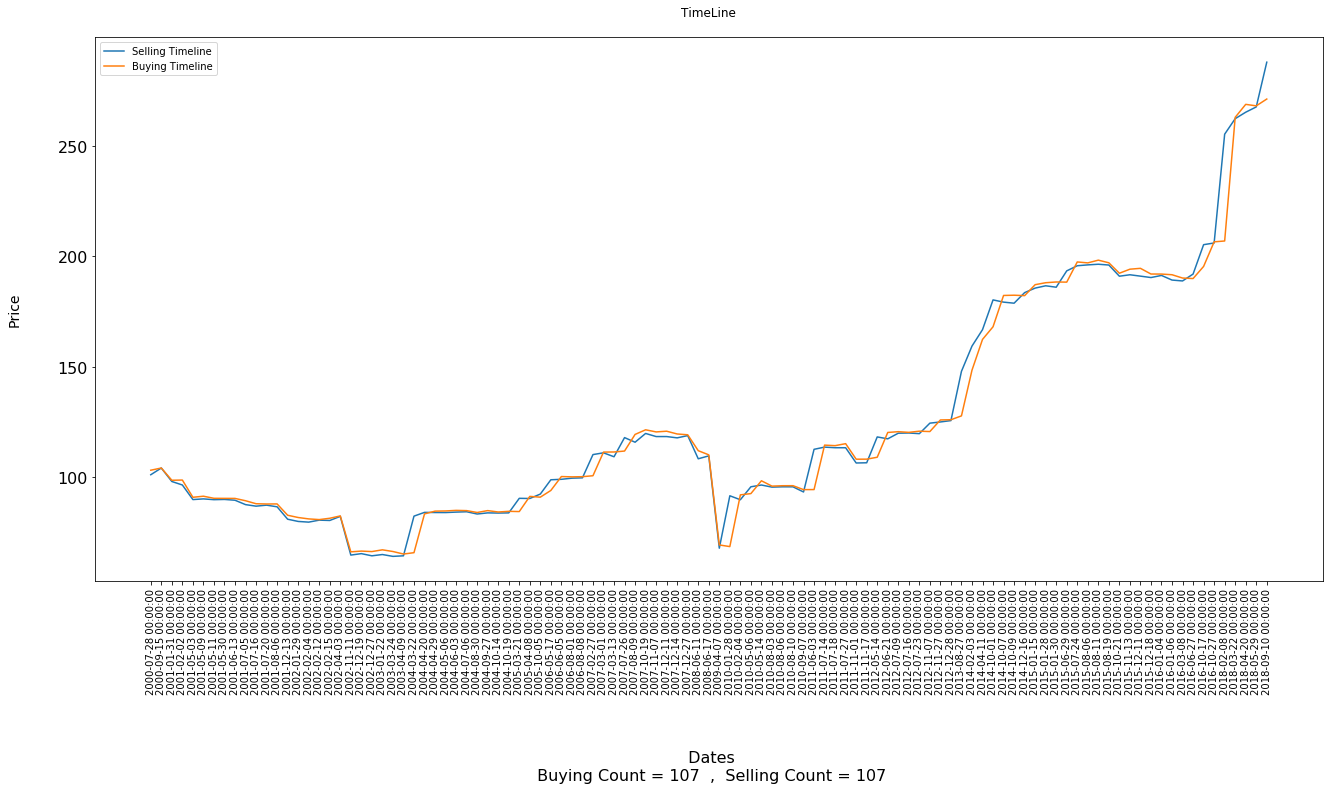

In [506]:
plt.rcParams["figure.figsize"] = [22,10]

plt.plot(range(len(sell_date_array)), sell_array)
plt.plot(range(len(buy_date_array)), buy_array)

plt.title("TimeLine\n")

plt.xlabel("\n\n\n Dates\n Buying Count = %d  ,  Selling Count = %d" % (len(buy_array), len(buy_array)), size = 16)
plt.ylabel("Price\n\n", size = 14)

plt.legend(['Selling Timeline','Buying Timeline' ], loc='upper left')
plt.yticks(size = 16)
plt.xticks(range(len(sell_date_array)), sell_date_array, size = 10,rotation='vertical')

plt.show()

## Implementing buy & hold strategy

we fetch the 1st & last row from the dataframe & calculate the profit when implementing the buy & hold strategy

In [507]:
first_SPY_value = SPY_hist_data.iloc[0,1]
last_SPY_value = SPY_hist_data.iloc[-1,1]

balance2 =1000
number_of_stocks += balance2 / first_SPY_value
balance2 = last_SPY_value * number_of_stocks 
number_of_stocks = 0
            
print('balance = ',balance2)
print ('percentage profit = ',(((balance2-1000))/1000)*100,'%')
print('number of stocks = ',number_of_stocks)


balance =  2895.1340444047846
percentage profit =  189.51340444047847 %
number of stocks =  0


as we can see that the 'Buy & Hold strategy' has more balance at the end of 18 years than the algorithm we implemented.

# comparing the 2 Strategies

we now plot the balance found after 18 years using both the strategies

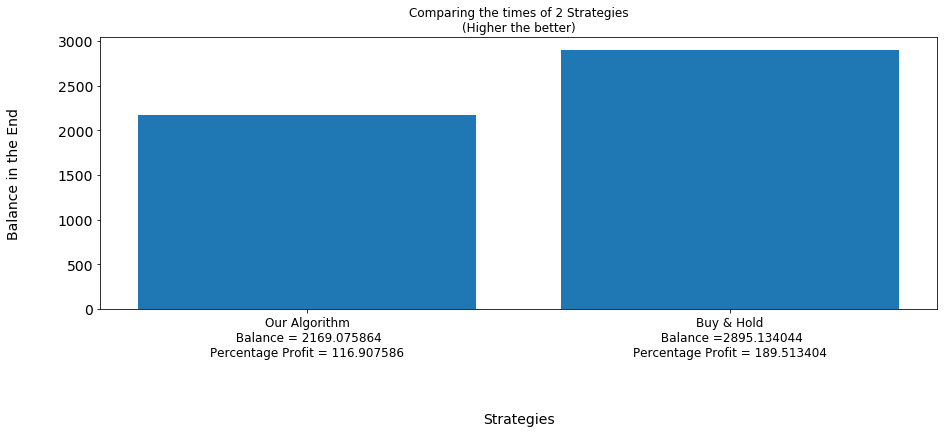

In [508]:
plt.rcParams["figure.figsize"] = [15,5]

startegyList = ['Our Algorithm\n Balance = %f\nPercentage Profit = %f' % (balance1,(((balance1-1000))/1000)*100),'Buy & Hold\n Balance =%f\nPercentage Profit = %f' % (balance2,(((balance2-1000))/1000)*100)]
balanceList = [balance1, balance2]

bars = plt.bar(range(len(startegyList)), balanceList)
plt.title("Comparing the times of 2 Strategies\n(Higher the better)")

plt.xlabel("\n\n\nStrategies", size = 14)
plt.ylabel("Balance in the End\n\n", size = 14)

plt.yticks(size = 14)
plt.xticks(range(len(startegyList)), startegyList, size = 12)

plt.show()